In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.ndimage import morphology as morph
from scipy.signal import fftconvolve, correlate
import numpy.linalg as LA
from sklearn.datasets import fetch_openml

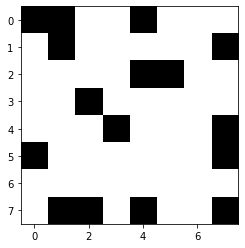

In [2]:
# Creates all combinations of 16 choose 4
from itertools import combinations 
comb = combinations(range(16),4)
sp = []
for i in comb:   
    sp.append(i)

# Choose 100 random samples from each class (classes are uniquely determined by the empty quadrants)  
sample=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
c=[0,0,0,0]
for j in range(15):
    a=np.binary_repr(j+1,width=4)
    for i in range(4):
        if int(a[i])==1:
            c[i]=np.random.choice(1820, 100, replace=False)
        else:
            c[i]=np.zeros(100)+1820
    sample[j]=np.column_stack((c[0],c[1],c[2],c[3]))

# Given a choice of 4 points out of 16, creates a quadrant with exactly 4 dots
def sdot(sp_data): 
    q=np.zeros(16)
    for j in sp_data:
        q[j]=1
    return np.array(q).reshape(4,4)

# Creates the cube with 4 qudrants given a sample
def sbuild(sample,sp):
    qube=np.zeros((8,8))
    if sample[0]<1820:
        qube[4:8,4:8]=sdot(sp[sample[0]])
    if sample[1]<1820:
        qube[4:8,0:4]=sdot(sp[sample[1]])
    if sample[2]<1820:
        qube[0:4,4:8]=sdot(sp[sample[2]])      
    if sample[3]<1820:
        qube[0:4,0:4]=sdot(sp[sample[3]])
    return qube    
    
# Transforms all samples into cubes
sqples=[]
for j in range(15):
    aqple=[]
    for k in range(100):
        qube=sbuild(sample[j][k].astype(int),sp)
        aqple.append(qube)
    sqples.append(aqple) 
    
plt.imshow(1-sqples[14][1], cmap = 'gray')

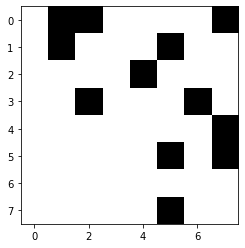

In [3]:
for j in range(11):
    plt.imshow(1-sqples[j][0], cmap = 'gray')

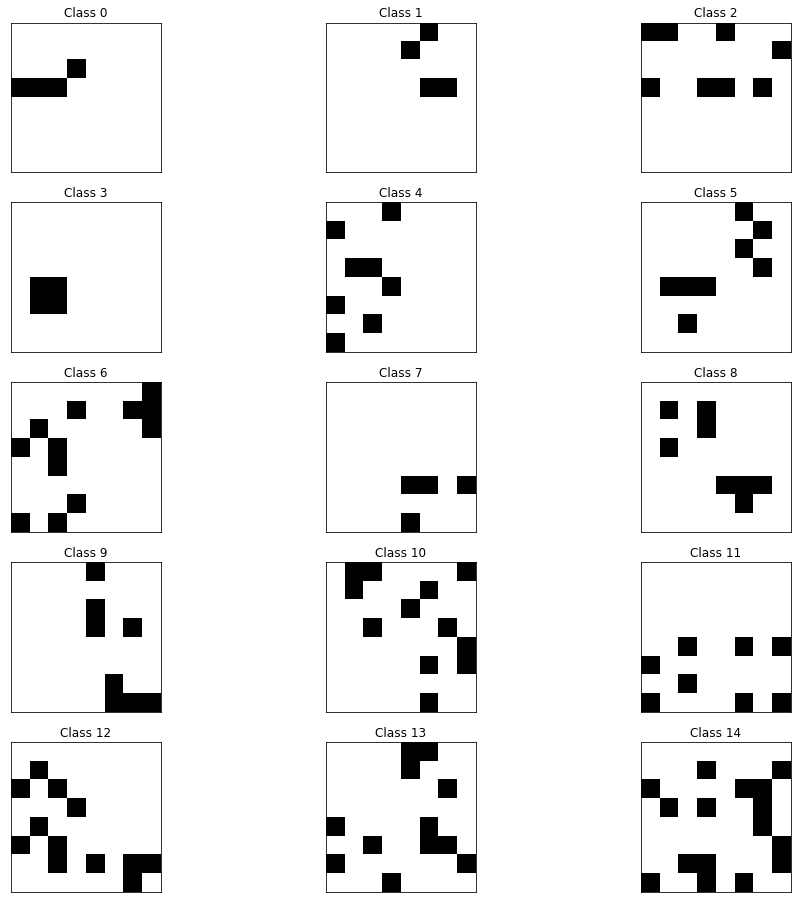

In [4]:
fig, ax = plt.subplots(5,3,figsize=(16,16))
ax

ax[0,0].imshow(1-sqples[0][0], cmap = 'gray')
ax[0,0].set(title = 'Class 0', xticks = [], yticks = []);
ax[0,1].imshow(1-sqples[1][0], cmap = 'gray')
ax[0,1].set(title = 'Class 1', xticks = [], yticks = []);
ax[0,2].imshow(1-sqples[2][0], cmap = 'gray')
ax[0,2].set(title = 'Class 2', xticks = [], yticks = []);
ax[1,0].imshow(1-sqples[3][0], cmap = 'gray')
ax[1,0].set(title = 'Class 3', xticks = [], yticks = []);
ax[1,1].imshow(1-sqples[4][0], cmap = 'gray')
ax[1,1].set(title = 'Class 4', xticks = [], yticks = []);
ax[1,2].imshow(1-sqples[5][0], cmap = 'gray')
ax[1,2].set(title = 'Class 5', xticks = [], yticks = []);
ax[2,0].imshow(1-sqples[6][0], cmap = 'gray')
ax[2,0].set(title = 'Class 6', xticks = [], yticks = []);
ax[2,1].imshow(1-sqples[7][0], cmap = 'gray')
ax[2,1].set(title = 'Class 7', xticks = [], yticks = []);
ax[2,2].imshow(1-sqples[8][0], cmap = 'gray')
ax[2,2].set(title = 'Class 8', xticks = [], yticks = []);
ax[3,0].imshow(1-sqples[9][0], cmap = 'gray')
ax[3,0].set(title = 'Class 9', xticks = [], yticks = []);
ax[3,1].imshow(1-sqples[10][0], cmap = 'gray')
ax[3,1].set(title = 'Class 10', xticks = [], yticks = []);
ax[3,2].imshow(1-sqples[11][0], cmap = 'gray')
ax[3,2].set(title = 'Class 11', xticks = [], yticks = []);
ax[4,0].imshow(1-sqples[12][0], cmap = 'gray')
ax[4,0].set(title = 'Class 12', xticks = [], yticks = []);
ax[4,1].imshow(1-sqples[13][0], cmap = 'gray')
ax[4,1].set(title = 'Class 13', xticks = [], yticks = []);
ax[4,2].imshow(1-sqples[14][0], cmap = 'gray')
ax[4,2].set(title = 'Class 14', xticks = [], yticks = []);

In [5]:
def find_class(cube):
    clas=0
    if bool(sum(sum(cube[0:4,0:4]))):
        clas+=1
    if bool(sum(sum(cube[0:4,4:8]))):
        clas+=2
    if bool(sum(sum(cube[4:8,0:4]))):
        clas+=4
    if bool(sum(sum(cube[4:8,4:8]))):
        clas+=8
    return clas-1

In [6]:
find_class(sqples[4][1])

4

In [7]:
np.array(sqples[5]).var()

0.109375

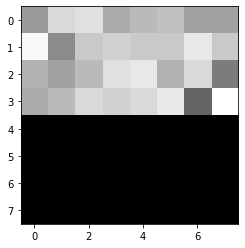

In [8]:
z=np.array(sqples[5])
plt.imshow(sum(sqples[2]), cmap = 'gray')